In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

In [19]:
cars = pd.read_csv('/kaggle/input/car_price_prediction.csv')

In [20]:
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [21]:
cars = cars.drop(columns='ID')

In [22]:
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [24]:
cars.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [25]:
cars[cars.Levy == '-'].shape[0] / cars.shape[0]

0.3024899932421895

In [26]:
cars = cars.drop(columns=['Levy'])

In [27]:
cars.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [28]:
fig = go.Figure()
sub_df = cars.groupby('Prod. year').agg({'Price': 'median'}).rename(columns={'Price': 'Median price'})
fig.add_trace(go.Bar(x=sub_df.index, y=sub_df['Median price'],
                    marker=dict(color=sub_df['Median price'], coloraxis='coloraxis', line=dict(color='black', width=2))))
fig.update_layout(xaxis_title='Год', yaxis_title='Медианная цена', # названия осей
                  yaxis_title_font_size=16, xaxis_title_font_size=16, # размер шрифта названий осей
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14, # размер шрифта меток на осях
                  title='Медианная цена автомобилей в зависимости от года', title_x=0.5, # заголовок
                  title_font_size=20,  # шрифт заголовка
                  width=None,  # ширина графика (максимальная, автоматически)
                  height=700, # высота графика
                  margin=dict(l=0, r=0, t=40, b=0)
                  )  
fig.update_xaxes(tickangle=315, # поворот меток по оси абсцисс на 315 градусов
                 gridwidth=2, gridcolor='ivory') # сетка по оси абсцисс
fig.update_yaxes(gridwidth=2, gridcolor='ivory') # сетка по оси ординат

In [29]:
sub_df = cars.groupby('Manufacturer').agg({'Manufacturer': 'count'}).rename(columns={'Manufacturer': 'Cars count'}) \
    .sort_values('Cars count', ascending=False).query('`Cars count` > 500')

In [30]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=sub_df.index, values=sub_df['Cars count'],
                     marker=dict(line=dict(color='black', width=2))))
fig.update_layout(title='Самые часто встречающиеся производители', title_x=0.5, # заголовок
                  title_font_size=20,  # шрифт заголовка
                  width=None,  # ширина графика (максимальная, автоматически)
                  height=700, # высота графика
                  margin=dict(l=0, r=0, t=40, b=10),
                  )
fig.update_traces(textposition='inside', textinfo='percent+label') # отображение названий внутри диаграммы
fig.show()

In [31]:
cars2 = cars.copy()

In [32]:
cars2.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [33]:
cars2.Mileage = cars2.Mileage.map(lambda x: int(x[:-3]))

In [34]:
cars2['Engine volume'] = cars2['Engine volume'].map(lambda x: float(x[:3]))

In [35]:
doors_dict = {'04-May': 4, '02-Mar': 2, '>5': 5}
cars2.Doors = cars2.Doors.map(lambda x: int(doors_dict[x]))

In [36]:
cars2  = cars2.drop(columns=['Model'])

In [37]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Prod. year        19237 non-null  int64  
 3   Category          19237 non-null  object 
 4   Leather interior  19237 non-null  object 
 5   Fuel type         19237 non-null  object 
 6   Engine volume     19237 non-null  float64
 7   Mileage           19237 non-null  int64  
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Doors             19237 non-null  int64  
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 2.2+ MB


In [38]:
cars2.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,16621,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,3607,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,11726,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4


In [39]:
cars2 = cars2[(cars2.Price < 500000) & (cars2.Price > 500)]

<AxesSubplot:xlabel='Price', ylabel='Count'>

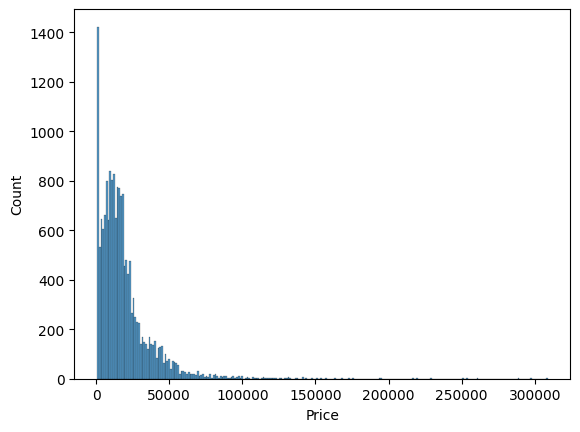

In [40]:
sns.histplot(data=cars2, x='Price')

<AxesSubplot:xlabel='Price'>

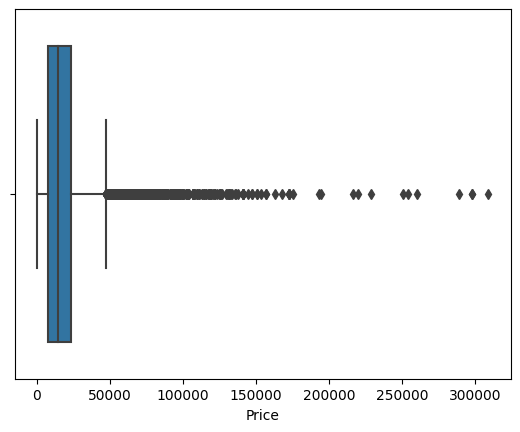

In [41]:
sns.boxplot(data=cars2, x='Price')

In [42]:
cars2.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,16621,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,3607,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,11726,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4


In [43]:
categorical_features = ['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Color']
cars_onehot = pd.get_dummies(cars2, columns=categorical_features)
binary_features = ['Leather interior', 'Wheel']
cars_onehot = pd.get_dummies(cars_onehot, columns=binary_features, drop_first=True)

In [44]:
cars_onehot

,Price,Manufacturer,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Category_Cabriolet,Category_Coupe,...,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Leather interior_Yes,Wheel_Right-hand drive
0,13328,LEXUS,2010,3.5,186005,6.0,4,12,0,0,...,0,0,0,0,1,0,0,0,1,0
1,16621,CHEVROLET,2011,3.0,192000,6.0,4,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8467,HONDA,2006,1.3,200000,4.0,4,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3607,FORD,2011,2.5,168966,4.0,4,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,11726,HONDA,2014,1.3,91901,4.0,4,4,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,MERCEDES-BENZ,2013,3.5,107800,6.0,4,12,0,0,...,0,0,0,0,0,0,0,0,1,0
19232,8467,MERCEDES-BENZ,1999,2.0,300000,4.0,2,5,0,1,...,0,0,0,0,1,0,0,0,1,0
19233,15681,HYUNDAI,2011,2.4,161600,4.0,4,8,0,0,...,0,0,0,1,0,0,0,0,1,0
19234,26108,HYUNDAI,2010,2.0,116365,4.0,4,4,0,0,...,0,0,0,0,0,0,0,0,1,0


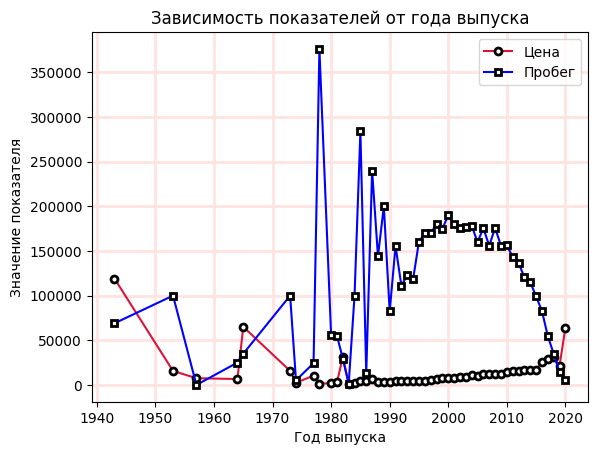

In [45]:
sub_df = cars_onehot.groupby('Prod. year', as_index=False).agg({'Price': 'median','Mileage': 'median'})
sub_df = sub_df[sub_df['Mileage'] < 5e5]

plt.plot(sub_df['Prod. year'], sub_df.Price, label='Цена', color='crimson', marker='o', markersize=5, 
         markerfacecolor='white', markeredgewidth=2, markeredgecolor='black')

plt.plot(sub_df['Prod. year'], sub_df.Mileage, label='Пробег', color='blue', marker='s', markersize=5, 
         markerfacecolor='white', markeredgewidth=2, markeredgecolor='black')

plt.title('Зависимость показателей от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Значение показателя')
plt.legend()
plt.grid(True, linewidth=2, color='mistyrose')

In [167]:
f_mnist = pd.read_csv('/kaggle/input/fashion-mnist_train.csv')

In [110]:
categories = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
data = f_mnist.copy()
data = data.drop(columns=['label'])
f_mnist.label = f_mnist.label.map(lambda x: categories[x])
f_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt/top,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
%%time
T = TSNE(n_components=2, perplexity=25, random_state=42)
TSNE_features = T.fit_transform(data)

C:\Users\1645286\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\1645286\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



CPU times: total: 46min 33s
Wall time: 8min 53s


<AxesSubplot:>

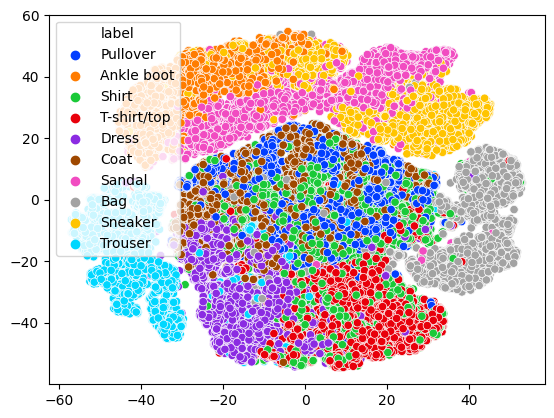

In [123]:
fig = plt.figure()
sns.scatterplot(x=TSNE_features[:,0], y=TSNE_features[:,1], hue=f_mnist['label'], palette='bright')

In [124]:
%%time
T = TSNE(n_components=2, perplexity=100, random_state=42)
TSNE_features = T.fit_transform(data)

C:\Users\1645286\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\1645286\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



CPU times: total: 1h 45s
Wall time: 14min 10s


<AxesSubplot:>

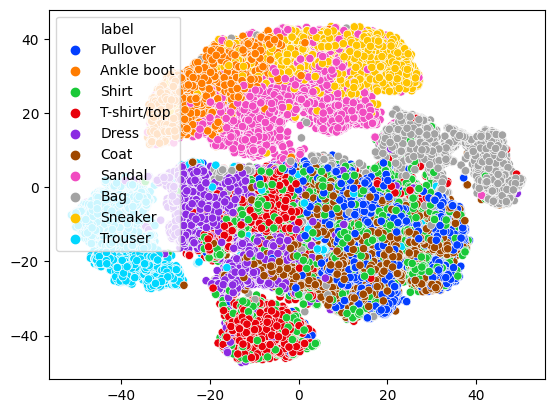

In [125]:
fig = plt.figure()
sns.scatterplot(x=TSNE_features[:,0], y=TSNE_features[:,1], hue=f_mnist['label'], palette='bright')

In [145]:
import umap
umap1 = umap.UMAP(n_neighbors=5, min_dist=0.1)
umap2 = umap.UMAP(n_neighbors=50, min_dist=0.1)
umap3 = umap.UMAP(n_neighbors=5, min_dist=0.5)
umap4 = umap.UMAP(n_neighbors=50, min_dist=0.5)
embeddings = {}

In [146]:
%%time
embeddings['n_neighbors=5, min_dist=0.1'] = umap1.fit_transform(data)

CPU times: total: 6min 58s
Wall time: 1min 42s


In [147]:
%%time
embeddings['n_neighbors=50, min_dist=0.1'] = umap2.fit_transform(data)

CPU times: total: 5min 10s
Wall time: 1min 13s


In [148]:
%%time
embeddings['n_neighbors=5, min_dist=0.5'] = umap3.fit_transform(data)

CPU times: total: 7min 12s
Wall time: 1min 41s


In [149]:
%%time
embeddings['n_neighbors=50, min_dist=0.5'] = umap4.fit_transform(data)

CPU times: total: 5min 18s
Wall time: 1min 19s


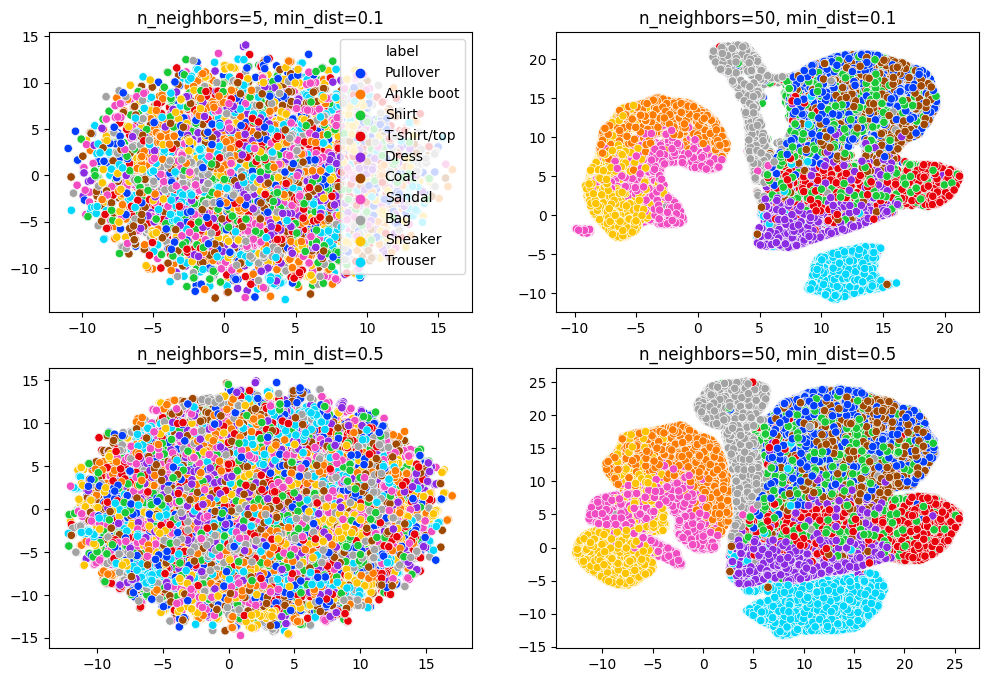

In [150]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, (name, embedding) in enumerate(embeddings.items()):
    legend = not bool(i)
    sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        hue=f_mnist['label'],
        palette='bright',
        ax=axes[i],
        legend=legend
    )
    axes[i].set_title(name)